In [60]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/diabetes-unclean/diabetes_unclean.csv


In [61]:
import pandas as pd

df = pd.read_csv('/kaggle/input/diabetes-unclean/diabetes_unclean.csv')

In [62]:
df.head()

,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,502,17975,F,50.0,4.7,46.0,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
1,735,34221,M,26.0,4.5,62.0,4.9,3.7,1.4,1.1,2.1,0.6,23.0,N
2,420,47975,F,50.0,4.7,46.0,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
3,680,87656,F,50.0,4.7,46.0,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
4,504,34223,M,33.0,7.1,46.0,4.9,4.9,1.0,0.8,2.0,0.4,21.0,N


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         1009 non-null   int64  
 1   No_Pation  1009 non-null   int64  
 2   Gender     1009 non-null   object 
 3   AGE        1008 non-null   float64
 4   Urea       1008 non-null   float64
 5   Cr         1007 non-null   float64
 6   HbA1c      1006 non-null   float64
 7   Chol       1007 non-null   float64
 8   TG         1007 non-null   float64
 9   HDL        1008 non-null   float64
 10  LDL        1007 non-null   float64
 11  VLDL       1008 non-null   float64
 12  BMI        1009 non-null   float64
 13  CLASS      1009 non-null   object 
dtypes: float64(10), int64(2), object(2)
memory usage: 110.5+ KB


In [64]:
df.describe()

,ID,No_Pation,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI
count,1009.000000,1.009000e+03,1008.000000,1008.000000,1007.000000,1006.000000,1007.000000,1007.000000,1008.000000,1007.000000,1008.000000,1009.000000
mean,339.161546,2.717448e+05,53.620040,5.131094,68.973188,8.284155,4.863873,2.348769,1.204216,2.610119,1.850595,29.589911
std,239.738169,3.365681e+06,8.740975,2.931136,59.813297,2.533576,1.297326,1.397487,0.658158,1.116095,3.649859,4.946246
min,1.000000,1.230000e+02,25.000000,0.500000,6.000000,0.900000,0.000000,0.300000,0.200000,0.300000,0.100000,19.000000
25%,127.000000,2.406500e+04,51.000000,3.700000,48.000000,6.500000,4.000000,1.500000,0.900000,1.800000,0.700000,26.000000
50%,296.000000,3.439900e+04,55.000000,4.600000,60.000000,8.000000,4.800000,2.000000,1.100000,2.500000,0.900000,30.000000
75%,548.000000,4.539000e+04,59.000000,5.700000,73.000000,10.200000,5.600000,2.900000,1.300000,3.300000,1.500000,33.000000
max,800.000000,7.543566e+07,79.000000,38.900000,800.000000,16.000000,10.300000,13.800000,9.900000,9.900000,35.000000,47.750000


<h1>Doing some EDA and Data Cleaning</h1>

In [65]:
# Dropping the ID and No_Pation columns
df  = df.drop('ID', axis = 1)
df  = df.drop('No_Pation', axis = 1)
df.head()


,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,F,50.0,4.7,46.0,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
1,M,26.0,4.5,62.0,4.9,3.7,1.4,1.1,2.1,0.6,23.0,N
2,F,50.0,4.7,46.0,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
3,F,50.0,4.7,46.0,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
4,M,33.0,7.1,46.0,4.9,4.9,1.0,0.8,2.0,0.4,21.0,N


In [66]:
#Now lets convert the categorical feature Gender to numerical
#using one-hot encoding
#But first lets take a look at the unique values

df.Gender.unique()

array(['F', 'M', 'f'], dtype=object)

In [67]:
#'f' need to be taken care of before one-hot encoding
df['Gender'] = df['Gender'].str.upper()
df.Gender.unique()


array(['F', 'M'], dtype=object)

In [68]:
# One-hot encoding now
df_dummies = pd.get_dummies(df,columns = ['Gender'],dtype=int)
df_dummies.head()

,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS,Gender_F,Gender_M
0,50.0,4.7,46.0,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N,1,0
1,26.0,4.5,62.0,4.9,3.7,1.4,1.1,2.1,0.6,23.0,N,0,1
2,50.0,4.7,46.0,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N,1,0
3,50.0,4.7,46.0,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N,1,0
4,33.0,7.1,46.0,4.9,4.9,1.0,0.8,2.0,0.4,21.0,N,0,1


In [69]:
#Looking for null values now

df_dummies.isna().sum()

AGE         1
Urea        1
Cr          2
HbA1c       3
Chol        2
TG          2
HDL         1
LDL         2
VLDL        1
BMI         0
CLASS       0
Gender_F    0
Gender_M    0
dtype: int64

In [70]:
df_filled = df_dummies.fillna(df_dummies.mode().iloc[0])
#df_filled = df_dummies.dropna(axis=0)     # we can also drop the rows with missing values using this
df_filled.isna().sum()

AGE         0
Urea        0
Cr          0
HbA1c       0
Chol        0
TG          0
HDL         0
LDL         0
VLDL        0
BMI         0
CLASS       0
Gender_F    0
Gender_M    0
dtype: int64

In [71]:
#Now a bit of EDA
#How many males and females are there in the dataset?
print(len(df_filled.loc[df_filled.Gender_M==1]))
print(len(df_filled.loc[df_filled.Gender_F==1]))


570
439


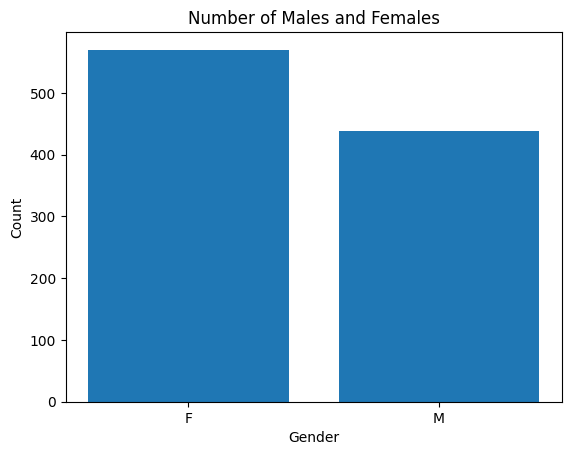

In [93]:
from matplotlib import pyplot as plt
gender_counts = df['Gender'].value_counts()
genders = df['Gender'].unique()
plt.bar(genders,gender_counts)
plt.title('Number of Males and Females')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

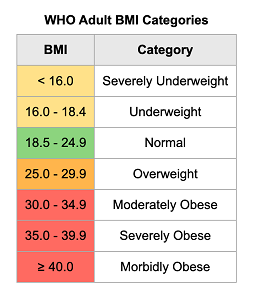

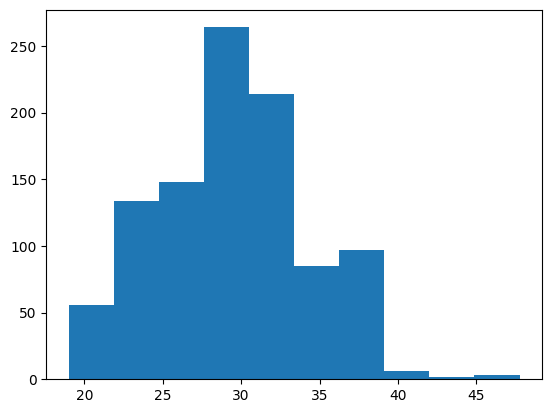

In [94]:
from matplotlib import pyplot as plt

#Plotting the distribution of BMI
plt.hist(df.BMI, bins =10)
plt.show()

In [95]:
#Whats the average BMI in the dataset?
df_filled["BMI"].mean()

29.589910802775027

In [96]:
#Whats the average BMI of males and females indovidually?
#Average BMI of males in the dataset
df_filled.loc[ df_filled['Gender_M'] == 1,'BMI'].mean()


29.90536842105263

In [97]:
#Average BMI of females in the dataset
df_filled.loc[ df_filled['Gender_F'] == 1,'BMI'].mean()

29.180318906605923

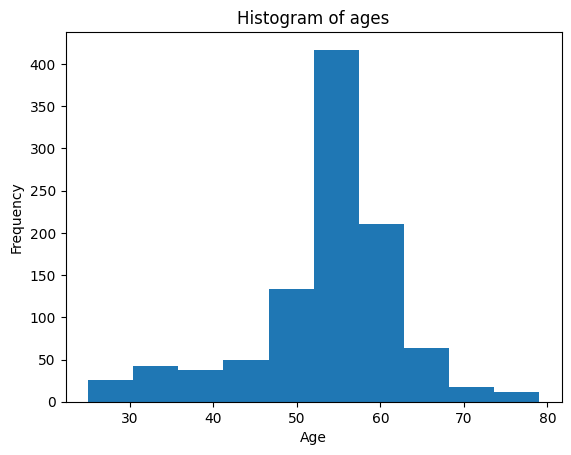

In [98]:
#PLotting the distribution of ages in the dataset
plt.hist(df.AGE)
plt.title("Histogram of ages")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

In [99]:
#No of ppl in 20s in the dataset with diabetes:

len(df_filled.loc[(df_filled.AGE<30) & (df_filled.AGE>19) & (df_filled.CLASS=='Y')])


4

In [100]:
# No of ppl in teens in the dataset with diabetes

len(df_filled.loc[(df_filled.AGE<20) & (df_filled.AGE>12) & (df_filled.CLASS=='Y')])



0

In [101]:
#Whats the max and min BMI of patients and non patients

df_filled.groupby('CLASS')['BMI'].agg(['max', 'min','mean'])


,max,min,mean
CLASS,,,
N,24.60,19.0,22.374757
Y,47.75,19.0,30.410177


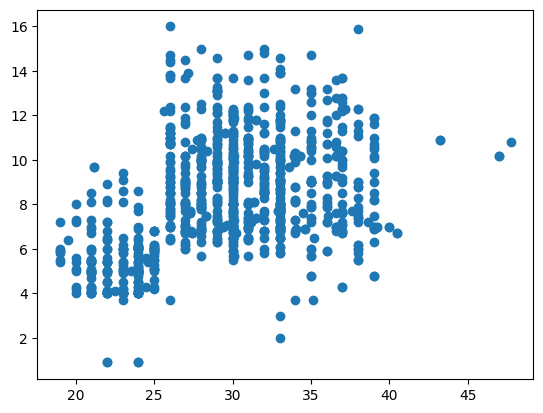

In [102]:
#Are those with a higher BMI at a higher risk of having higher HbA1c ?
plt.scatter(df.BMI,df.HbA1c)
plt.show()

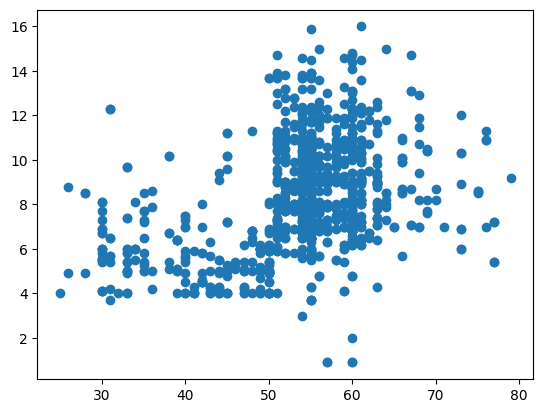

In [103]:
#Are those who have a higher age at a risk of higher HbA1c
plt.scatter(df.AGE, df.HbA1c)
plt.show()

In [104]:
#Now lets take a look at the target variable before implementing ML

df.CLASS.unique()

array(['N', 'N ', 'P', 'Y', 'Y '], dtype=object)

In [105]:
#This needs cleaning
df_filled.loc[df_filled.CLASS=='N ','CLASS'] = 'N'
df_filled.loc[df_filled.CLASS=='Y ','CLASS'] = 'Y'
df_filled.loc[df_filled["CLASS"]=='P','CLASS'] = 'Y'

df_filled.CLASS.unique()

array(['N', 'Y'], dtype=object)

In [106]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score


In [107]:
#labels
y = df_filled["CLASS"]
y.head()

0    N
1    N
2    N
3    N
4    N
Name: CLASS, dtype: object

In [108]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)
y



array([0, 0, 0, ..., 1, 1, 1])

In [109]:
X = df_filled.drop("CLASS", axis = 1)

In [110]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)

<h1>Now testing a few cassifiers </n>

In [111]:
#SVM Model training

model = SVC()

#Fitting the model on the data
model.fit(X_train, y_train)
#Making predictions on the test data
y_hat = model.predict(X_test)
accuracy = accuracy_score(y_test, y_hat)
precision = precision_score(y_test, y_hat)#, average='weighted')
recall = recall_score(y_test, y_hat)#, average='weighted')

In [112]:
print("Accuracy: ", accuracy)
print("Precision: ",precision )
print("Recall: ",recall )


Accuracy:  0.8811881188118812
Precision:  0.8811881188118812
Recall:  1.0


In [113]:
model = DecisionTreeClassifier()
#Fitting the model on the data
model.fit(X_train, y_train)
#Making predictions on the test data
y_hat = model.predict(X_test)
accuracy = accuracy_score(y_test, y_hat)
precision = precision_score(y_test, y_hat)#, average='weighted')
recall = recall_score(y_test, y_hat)#, average='weighted')
print("Accuracy: ", accuracy)
print("Precision: ",precision )
print("Recall: ",recall )


Accuracy:  0.9900990099009901
Precision:  0.9925373134328358
Recall:  0.9962546816479401
